# Algorythme de recommandation

Contexte: 
Création d'un algorythme de recommandation afin de concurrencé ( Détruire ) Netflix

Objectif:
- Creation d'une base de données relationel contenant notre csv de base et le requeté
- Visualisé la donnée afin de pouvoir identifier des tendance et des difference entre les films
- Nettoyer la donnée en fonction de nos attente et notre visualisation
- Creation d'un modele de base ( Baseline ) afin de determiné les prediciton d'un modele de "base" type clustering
- Essaie d'autre modele et affinage de ceux ci
- Creation d'un streamlit
- Enregistrement des prediciton dans la BDD

## Recuperation des données sur la BDD

In [1]:
from sqlalchemy import create_engine, text
import pandas as pd
import seaborn as sns
import mysql.connector
import missingno as msno
import pymysql
import matplotlib.pyplot as plt

In [37]:
# df_1 = pd.read_csv("movie_metadata.csv")

# engine = create_engine('mysql+pymysql://root:@localhost:3306/imdb')
# conn = engine.connect()
# df_1.to_sql('movie', engine, if_exist='replace')

In [ ]:
db_connection_info = {
    'user': 'root',
    'password': 'root',
    'host': '4.tcp.eu.ngrok.io',
    'port': 4040 ,
    'database': 'imdb'
}

db_url = f"mysql+mysqlconnector://{db_connection_info['user']}:{db_connection_info['password']}@{db_connection_info['host']}:{db_connection_info['port']}/{db_connection_info['database']}"

engine = create_engine(db_url)

connection = engine.connect()

query = text("SELECT * FROM movie")
result = connection.execute(query)

df = pd.read_sql(query, con=engine)

In [3]:
df

,index,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,4,None,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,...,NaN,None,None,None,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,...,6.0,English,Canada,None,NaN,2013.0,470.0,7.7,NaN,84
5039,5039,Color,None,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,...,3.0,English,USA,None,1400.0,2013.0,0.0,6.3,NaN,16
5041,5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      5043 non-null   int64  
 1   color                      5024 non-null   object 
 2   director_name              4939 non-null   object 
 3   num_critic_for_reviews     4993 non-null   float64
 4   duration                   5028 non-null   float64
 5   director_facebook_likes    4939 non-null   float64
 6   actor_3_facebook_likes     5020 non-null   float64
 7   actor_2_name               5030 non-null   object 
 8   actor_1_facebook_likes     5036 non-null   float64
 9   gross                      4159 non-null   float64
 10  genres                     5043 non-null   object 
 11  actor_1_name               5036 non-null   object 
 12  movie_title                5043 non-null   object 
 13  num_voted_users            5043 non-null   int64

## EDA

### Wordcloud des mots clefs

In [5]:
from wordcloud import WordCloud
from collections import Counter

In [6]:
text = " ".join(keywords for keywords in df.plot_keywords.astype(str))
text = text.replace('nan', '')

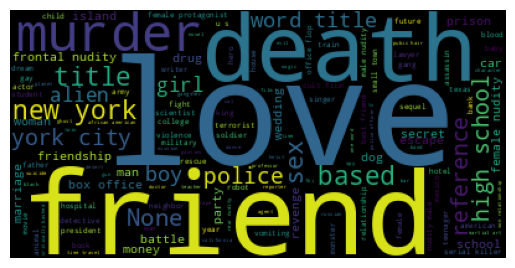

In [7]:

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [8]:
#colonnes dummies pour les keywords
movies_df_keywords = df['plot_keywords'].str.get_dummies(sep='|')

In [9]:
keywords_counts = movies_df_keywords.sum()

# Display the genre counts in descending order
keywords_counts = keywords_counts.sort_values(ascending=False)

# Display the result
print(keywords_counts)

love                       198
friend                     166
murder                     161
death                      132
police                     126
                          ... 
high society                 1
high school sweethearts      1
high school romance          1
high school prom             1
lightning bolt               1
Length: 8086, dtype: int64


On sait qu'on peut retirer tous les keywords associés uniquement à un film, car on ne pourra pas s'en servir pour faire un association.

Pour éviter de surcharger le dataframe, on décide de retirer tous les keywords qui ne sont pas associés à au moins 5 film

In [10]:
#On supprime les colonnes sous représentées : 
movies_df_keywords = movies_df_keywords.loc[:, keywords_counts >= 5]

In [11]:
keywords_counts = movies_df_keywords.sum()

# Display the genre counts in descending order
keywords_counts = keywords_counts.sort_values(ascending=False)

# Display the result
print(keywords_counts)

love            198
friend          166
murder          161
death           132
police          126
               ... 
real estate       5
driver            5
duel              5
dwarf             5
17th century      5
Length: 1024, dtype: int64


## Genre

In [13]:
#colonnes dummies pour le genre
movies_df_genres = df['genres'].str.get_dummies(sep='|')

In [14]:
genre_counts = movies_df_genres.sum()

# Display the genre counts in descending order
genre_counts = genre_counts.sort_values(ascending=False)

# Display the result
print(genre_counts)

Drama          2594
Comedy         1872
Thriller       1411
Action         1153
Romance        1107
Adventure       923
Crime           889
Sci-Fi          616
Fantasy         610
Horror          565
Family          546
Mystery         500
Biography       293
Animation       242
Music           214
War             213
History         207
Sport           182
Musical         132
Documentary     121
Western          97
Film-Noir         6
Short             5
News              3
Reality-TV        2
Game-Show         1
dtype: int64


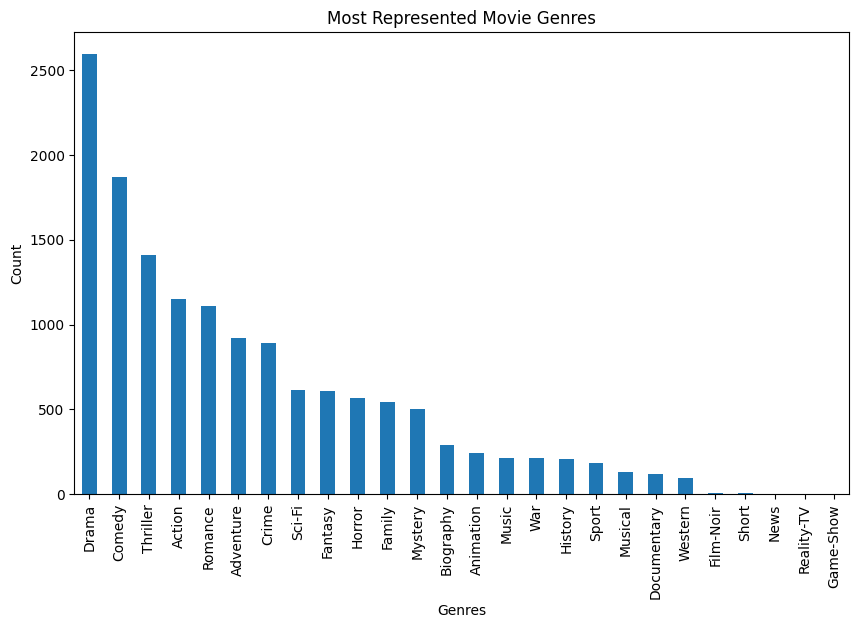

In [15]:
# Plot the genre counts
genre_counts.plot(kind='bar', figsize=(10, 6))
plt.title("Most Represented Movie Genres")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.show()

In [16]:
#On supprime les colonnes sous représentées : 
movies_df_genres = movies_df_genres.loc[:, genre_counts >= 5]

In [17]:
#On merge les colonnes avec le df, et on supprime la colonne "genres"
movies_df = pd.merge(df, movies_df_genres, left_index=True, right_index=True)
df.drop('genres', axis=1, inplace=True)

## Director name

In [18]:
#colonnes dummies pour les keywords
movies_df_directors = movies_df['director_name'].str.get_dummies()

In [19]:
directors_counts = movies_df_directors.sum()

# Display the genre counts in descending order
directors_counts = directors_counts.sort_values(ascending=False)

# Display the result
print(directors_counts)

Steven Spielberg    26
Woody Allen         22
Clint Eastwood      20
Martin Scorsese     20
Ridley Scott        17
                    ..
James O'Brien        1
James Nunn           1
James Mottern        1
James Melkonian      1
Étienne Faure        1
Length: 2398, dtype: int64


In [20]:
#On supprime les colonnes sous représentées : 
movies_df_directors = movies_df_directors.loc[:, directors_counts >= 5]

In [21]:
directors_counts = movies_df_directors.sum()

# Display the genre counts in descending order
directors_counts = directors_counts.sort_values(ascending=False)

# Display the result
print(directors_counts)

Steven Spielberg    26
Woody Allen         22
Martin Scorsese     20
Clint Eastwood      20
Ridley Scott        17
                    ..
John Lasseter        5
John Lee Hancock     5
Peter Chelsom        5
Peter Cattaneo       5
Kirk Jones           5
Length: 226, dtype: int64


## Actors

In [25]:
movies_df_actor_1 = movies_df['actor_1_name'].str.get_dummies()
movies_df_actor_2 = movies_df['actor_2_name'].str.get_dummies()
movies_df_actor_3 = movies_df['actor_3_name'].str.get_dummies()

In [26]:
movies_df_actors = movies_df_actor_1 + movies_df_actor_3 + movies_df_actor_2

In [30]:
actors_counts = movies_df_actors.sum()

# Display the genre counts in descending order
actors_counts = actors_counts.sort_values(ascending=False)

# Display the result
print(actors_counts)

Morgan Freeman         47.0
Bruce Willis           40.0
Matt Damon             38.0
Steve Buscemi          37.0
Bill Murray            34.0
                       ... 
Gustav Fröhlich         0.0
Gustaf Skarsgård        0.0
Gus Van Sant            0.0
Guro Nagelhus Schia     0.0
Óscar Jaenada           0.0
Length: 6255, dtype: float64


In [31]:
#On supprime les colonnes sous représentées : 
movies_df_actors = movies_df_actors.loc[:, actors_counts >= 5]

In [32]:
actors_counts = movies_df_actors.sum()

# Display the genre counts in descending order
actors_counts = actors_counts.sort_values(ascending=False)

# Display the result
print(actors_counts)

Morgan Freeman       47
Bruce Willis         40
Matt Damon           38
Steve Buscemi        37
Brad Pitt            34
                     ..
Esai Morales          5
Fionnula Flanagan     5
François Cluzet       5
Michael Berryman      5
50 Cent               5
Length: 455, dtype: int64
